In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import itertools
import collections
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import math
sns.set()

# 1 Read Data and Preprocessing

In [3]:
df_original = pd.read_csv('movieReplicationSet.csv')
# df_original = df_original.apply(pd.to_numeric, errors = 'coerce')
df_original

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,...,3.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,0,0
1093,3.0,4.0,NaN,NaN,4.0,4.0,2.5,NaN,3.5,3.5,...,5.0,3.0,5.0,5.0,5.0,6.0,5.0,1.0,0,0
1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,...,6.0,3.0,1.0,6.0,6.0,4.0,2.0,1.0,0,0
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,4.0,3.0,3.0,1.0,1.0,0,1


In [4]:
#some basic settings for the data frame
N_user = 1097
N_movie = 400
movie_list = list(df_original)[0:N_movie] # get the list of movie name

In [5]:
#we find that there is a user that has no ratings for any movie
for i in range(N_user):
    no_valid_rating = True
    for j in range(N_movie):
        if not np.isnan(df_original.iloc[i, :N_movie][j]):
            no_valid_rating = False
    if no_valid_rating == True:
        print('user', str(i+1), 'has no rating for any movie')

user 897 has no rating for any movie


In [ ]:
def data_imputation_by_mean(i, j):
    row_mean = df_original.iloc[i, :N_movie].mean() #note that user 896 doesn't rate any movie, so its row mean is nan
    col_mean = df_original.iloc[:, j].mean()
    
    if not np.isnan(row_mean) and not np.isnan(col_mean):
        result = (row_mean + col_mean)/2
    elif np.isnan(row_mean) and not np.isnan(col_mean):
        result = col_mean
    elif not np.isnan(row_mean) and np.isnan(col_mean):
        result = row_mean
    else:
        result = 2.5 #just a random number, you can modify it

    return result

In [12]:
# For prediction, we have to fill in the missing data
# For each of the missing score, we use arithmetic mean of each column and each row here (this could be problematic but it is simple)
df_imputation = df_original.copy(deep = True) 
for i in range(N_user):
    for j in range(N_movie):
        if np.isnan(df_original.iloc[i, j]):
            df_imputation .iloc[i, j] = data_imputation_by_mean(i, j)

In [13]:
#save data with imputation to csv
df_imputation.to_csv('movieReplicationSet_imputation.csv', index=False)
del df_imputation

In [6]:
# df = pd.read_csv('movieReplicationSet_imputation.csv')
df = pd.read_csv('movieReplicationSet_imputation.csv')

#Read data that missing data already been handled by Data Preprocessing for Machine Learning Part.ipynb
df = df.apply(pd.to_numeric, errors = 'coerce')
df

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,2.447086,2.381992,4.000000,2.725235,3.000000,2.670257,2.554121,2.821232,2.619604,2.827211,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,2.439294,2.374200,1.500000,2.717443,2.752945,2.662464,2.546329,2.813440,2.611812,2.819419,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,2.733065,2.667971,3.234118,3.011214,3.046716,2.956236,2.840100,3.107211,2.905583,3.113190,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,2.282975,2.217880,2.000000,2.561123,3.000000,2.506145,2.390009,2.657120,2.455492,4.000000,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,2.209132,2.144038,3.500000,2.487281,0.500000,2.432303,0.500000,1.000000,2.381650,0.000000,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,2.675658,2.610563,3.176711,2.953806,3.500000,2.898828,2.782692,3.049803,2.848175,3.055782,...,3.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,0,0
1093,3.000000,4.000000,3.413546,3.190641,4.000000,4.000000,2.500000,3.286638,3.500000,3.500000,...,5.0,3.0,5.0,5.0,5.0,6.0,5.0,1.0,0,0
1094,2.641923,2.576828,3.142976,2.920071,2.955574,2.865093,2.748957,3.500000,2.814440,3.022047,...,6.0,3.0,1.0,6.0,6.0,4.0,2.0,1.0,0,0
1095,2.770970,2.705876,3.272023,3.049119,3.084621,2.994141,2.878005,3.145116,2.943488,3.151095,...,1.0,1.0,1.0,4.0,3.0,3.0,1.0,1.0,0,1


In [7]:
# entry i of the list is the numpy array of score of movie i
movie_rating_list = []
for i in range(N_movie):
    movie_rating_list.append(np.array(df.iloc[:,i]))

# 2 Solve Problems

### Q1

For each of the 400 movies, use a simple linear regression model to predict the ratings. Use the ratings
of the *other* 399 movies in the dataset to predict the ratings of each movie (that means you’ll have
to build 399 models for each of the 400 movies). For each of the 400 movies, find the movie that
predicts ratings the best. Then report the average COD of those 400 simple linear regression models.
Please include a histogram of these 400 COD values and a table with the 10 movies that are most
easily predicted from the ratings of a single other movie and the 10 movies that are hardest to predict
from the ratings of a single other movie

In [8]:
best_predictor_index_for_each_movie = []
max_COD_for_each_movie = []

for i in range(N_movie): # index of object movie
    COD_list = [0 for i in range(N_movie)] #record COD
    for j in range(N_movie): # index of current predictor movie
        if i == j:
            #we don't want to use a movie score to predict itself
            continue
        else: # i != j
            x = movie_rating_list[j]
            y = movie_rating_list[i]
            reg = LinearRegression(fit_intercept = True).fit(x.reshape(-1,1), y)
            y_hat = reg.predict(x.reshape(-1,1)) #prediction
            COD = reg.score(x.reshape(-1,1),y)
            # COD = r2_score(y,y_hat)
            COD_list[j] = COD
        
    COD_list = np.array(COD_list)
    max_COD_index, max_COD = np.argmax(COD_list), np.max(COD_list)
    
    best_predictor_index_for_each_movie.append(max_COD_index)
    max_COD_for_each_movie.append(max_COD)

best_predictor_index_for_each_movie = np.array(best_predictor_index_for_each_movie)
max_COD_for_each_movie = np.array(max_COD_for_each_movie)

In [345]:
np.mean(np.array(max_COD_for_each_movie))

0.4237994048248016

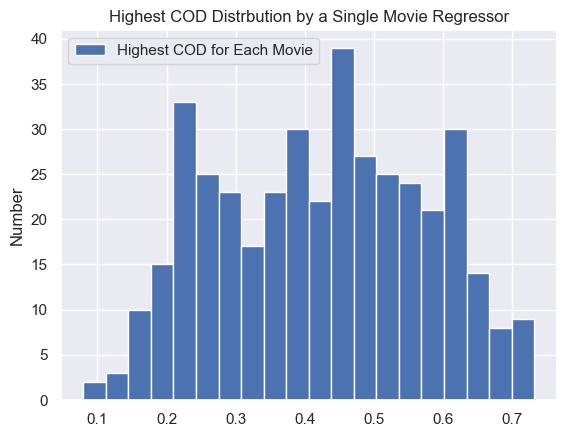

In [194]:
plt.hist(max_COD_for_each_movie, label = 'Highest COD for Each Movie', bins = 20)
plt.ylabel("Number")
plt.title('Highest COD Distrbution by a Single Movie Regressor')
plt.legend()
plt.show()

In [10]:
top_10_easiest_index = max_COD_for_each_movie.argsort()[-10:][::-1]
top_10_hardest_index = max_COD_for_each_movie.argsort()[:10]
top_10_easiest_index, top_10_hardest_index

(array([203, 208, 395, 377, 249, 240, 287, 282, 334, 309]),
 array([ 80,  95,   9,  55, 190, 319, 292,  41,  14, 248]))

In [11]:
max_COD_for_each_movie[top_10_easiest_index], max_COD_for_each_movie[top_10_hardest_index]

(array([0.73178917, 0.73178917, 0.71379271, 0.71379271, 0.7115399 ,
        0.7115399 , 0.70082232, 0.70082232, 0.70043714, 0.69286332]),
 array([0.07948381, 0.11118396, 0.11696976, 0.14132385, 0.14392519,
        0.14835836, 0.15392046, 0.160118  , 0.16899973, 0.17115123]))

In [16]:
df_top_10_easiest = pd.DataFrame(columns=['rank', 'Movie Names', 'Associated COD', 'Best Predictor Movies'])
count = 1
for i in top_10_easiest_index:
    movie_name = movie_list[i]
    associated_COD = max_COD_for_each_movie[i]
    best_predictor_movie_name = movie_list[best_predictor_index_for_each_movie[i]]
    df_top_10_easiest.loc[len(df_top_10_easiest.index)] = [count, movie_name, associated_COD, best_predictor_movie_name]
    count += 1
display(df_top_10_easiest)

,rank,Movie Names,Associated COD,Best Predictor Movies
0,1,Erik the Viking (1989),0.731789,I.Q. (1994)
1,2,I.Q. (1994),0.731789,Erik the Viking (1989)
2,3,Patton (1970),0.713793,The Lookout (2007)
3,4,The Lookout (2007),0.713793,Patton (1970)
4,5,Best Laid Plans (1999),0.711540,The Bandit (1996)
5,6,The Bandit (1996),0.711540,Best Laid Plans (1999)
6,7,The Straight Story (1999),0.700822,Congo (1995)
7,8,Congo (1995),0.700822,The Straight Story (1999)
8,9,The Final Conflict (1981),0.700437,The Lookout (2007)
9,10,Heavy Traffic (1973),0.692863,Ran (1985)


In [18]:
df_top_10_hardest = pd.DataFrame(columns=['rank', 'Movie Names', 'Associated COD', 'Best Predictor Movies'])
count = 1
for i in top_10_hardest_index:
    movie_name = movie_list[i]
    associated_COD = max_COD_for_each_movie[i]
    best_predictor_movie_name = movie_list[best_predictor_index_for_each_movie[i]]
    df_top_10_hardest.loc[len(df_top_10_hardest.index)] = [count, movie_name, associated_COD, best_predictor_movie_name]
    count += 1
display(df_top_10_hardest)

,rank,Movie Names,Associated COD,Best Predictor Movies
0,1,Avatar (2009),0.079484,Bad Boys (1995)
1,2,Interstellar (2014),0.111184,Torque (2004)
2,3,Black Swan (2010),0.116970,Sorority Boys (2002)
3,4,Clueless (1995),0.141324,Escape from LA (1996)
4,5,The Cabin in the Woods (2012),0.143925,The Evil Dead (1981)
5,6,La La Land (2016),0.148358,The Lookout (2007)
6,7,Titanic (1997),0.153920,Cocktail (1988)
7,8,13 Going on 30 (2004),0.160118,Can't Hardly Wait (1998)
8,9,The Fast and the Furious (2001),0.169000,Terminator 3: Rise of the Machines (2003)
9,10,Grown Ups 2 (2013),0.171151,The Core (2003)


### Q2

For the 10 movies that are best and least well predicted from the ratings of a single other movie (so
20 in total), build multiple regression models that include gender identity (column 475), sibship status
(column 476) and social viewing preferences (column 477) as additional predictors (in addition to the
best predicting movie from question 1). Comment on how R^2 has changed relative to the answers
in question 1. Please include a figure with a scatterplot where the old COD (for the simple linear
regression models from the previous question) is on the x-axis and the new R^2 (for the new multiple
regression models) is on the y-axis.

In [19]:
#because answers are categorical data, we apply onehot encoding to get dummies
gender_onehot = pd.get_dummies(df['Gender identity (1 = female; 2 = male; 3 = self-described)']).to_numpy()
sibship_onehot = pd.get_dummies(df['Are you an only child? (1: Yes; 0: No; -1: Did not respond)']).to_numpy()
social_viewing_onehot = pd.get_dummies(df['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)']).to_numpy()

add new predictors to top 10 easiest movies

In [20]:
#add new predictor to top 10 easiest
mutiple_regression_COD_list_easiest = []
for i in top_10_easiest_index:
    x1 = movie_rating_list[best_predictor_index_for_each_movie[i]].reshape(-1, 1) #best single movie predictor
    x2 = gender_onehot.reshape(-1, 3) #gender predictor
    x3 = sibship_onehot.reshape(-1, 3) #sibship predictor
    x4 = social_viewing_onehot.reshape(-1, 3) #social viewing predictor

    x = np.concatenate((x1, x2, x3, x4), axis=1)
    y = movie_rating_list[i]

    reg = LinearRegression(fit_intercept=False).fit(x, y)
    y_hat = reg.predict(x) #prediction
    COD = r2_score(y,y_hat)
    mutiple_regression_COD_list_easiest.append(COD)

mutiple_regression_COD_list_easiest = np.array(mutiple_regression_COD_list_easiest)
mutiple_regression_COD_list_easiest

array([0.73353077, 0.73231804, 0.71500476, 0.71602964, 0.7129878 ,
       0.71360558, 0.70261039, 0.70138935, 0.70260211, 0.69356783])

In [198]:
df_top_10_easiest_COD_changed = pd.DataFrame(columns=['Movie Names', 'Old COD', 'New COD', 'Increase Proportion', 'Increased Absolute Value'])
count = 0
for i in top_10_easiest_index:
    movie_name = movie_list[i]
    old_COD = max_COD_for_each_movie[i]
    new_COD = mutiple_regression_COD_list_easiest[count]
    increased_proportion = '{:.2%}'.format((new_COD - old_COD)/old_COD)
    
    df_top_10_easiest_COD_changed.loc[len(df_top_10_easiest_COD_changed.index)] = [movie_name, old_COD, new_COD, increased_proportion, new_COD - old_COD]
    count += 1
display(df_top_10_easiest_COD_changed)

,Movie Names,Old COD,New COD,Increase Proportion,Increased Absolute Value
0,Erik the Viking (1989),0.731789,0.733531,0.24%,0.001742
1,I.Q. (1994),0.731789,0.732318,0.07%,0.000529
2,Patton (1970),0.713793,0.715005,0.17%,0.001212
3,The Lookout (2007),0.713793,0.716030,0.31%,0.002237
4,Best Laid Plans (1999),0.711540,0.712988,0.20%,0.001448
5,The Bandit (1996),0.711540,0.713606,0.29%,0.002066
6,The Straight Story (1999),0.700822,0.702610,0.26%,0.001788
7,Congo (1995),0.700822,0.701389,0.08%,0.000567
8,The Final Conflict (1981),0.700437,0.702602,0.31%,0.002165
9,Heavy Traffic (1973),0.692863,0.693568,0.10%,0.000705


add new predictors to top 10 hardest movies

In [23]:
#add new predictor to top 10 hardest
mutiple_regression_COD_list_hardest = []
for i in top_10_hardest_index:
    x1 = movie_rating_list[best_predictor_index_for_each_movie[i]].reshape(-1, 1) #best single movie predictor
    x2 = gender_onehot.reshape(-1, 3) #gender predictor
    x3 = sibship_onehot.reshape(-1, 3) #sibship predictor
    x4 = social_viewing_onehot.reshape(-1, 3) #social viewing predictor

    x = np.concatenate((x1, x2, x3, x4), axis=1)
    y = movie_rating_list[i]

    reg = LinearRegression(fit_intercept=False).fit(x, y)
    y_hat = reg.predict(x) #prediction
    COD = r2_score(y,y_hat)
    mutiple_regression_COD_list_hardest.append(COD)

mutiple_regression_COD_list_hardest = np.array(mutiple_regression_COD_list_hardest)
mutiple_regression_COD_list_hardest

array([0.08278352, 0.11965011, 0.12337341, 0.14907646, 0.15907862,
       0.15644076, 0.16324889, 0.16847711, 0.17878973, 0.18185932])

In [199]:
df_top_10_hardest_COD_changed = pd.DataFrame(columns=['Movie Names', 'Old COD', 'New COD', 'Increase Proportion', 'Increased Absolute Value'])
count = 0
for i in top_10_hardest_index:
    movie_name = movie_list[i]
    old_COD = max_COD_for_each_movie[i]
    new_COD = mutiple_regression_COD_list_hardest[count]
    increased_proportion = '{:.2%}'.format((new_COD - old_COD)/old_COD)
    df_top_10_hardest_COD_changed.loc[len(df_top_10_hardest_COD_changed.index)] = [movie_name, old_COD, new_COD, increased_proportion, new_COD - old_COD]
    count += 1
display(df_top_10_hardest_COD_changed)

,Movie Names,Old COD,New COD,Increase Proportion,Increased Absolute Value
0,Avatar (2009),0.079484,0.082784,4.15%,0.003300
1,Interstellar (2014),0.111184,0.119650,7.61%,0.008466
2,Black Swan (2010),0.116970,0.123373,5.47%,0.006404
3,Clueless (1995),0.141324,0.149076,5.49%,0.007753
4,The Cabin in the Woods (2012),0.143925,0.159079,10.53%,0.015153
5,La La Land (2016),0.148358,0.156441,5.45%,0.008082
6,Titanic (1997),0.153920,0.163249,6.06%,0.009328
7,13 Going on 30 (2004),0.160118,0.168477,5.22%,0.008359
8,The Fast and the Furious (2001),0.169000,0.178790,5.79%,0.009790
9,Grown Ups 2 (2013),0.171151,0.181859,6.26%,0.010708


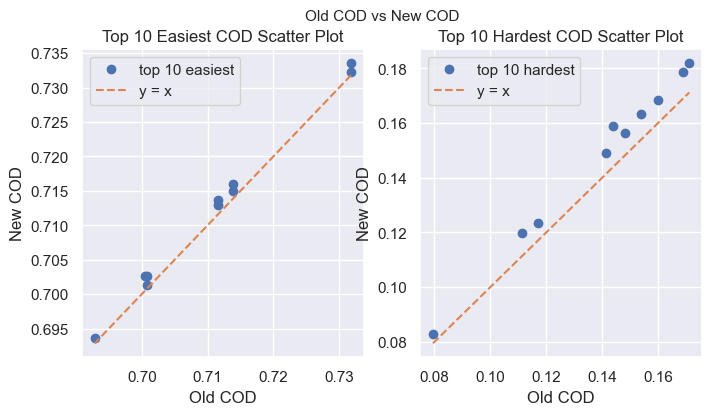

In [200]:
fig, ax = plt.subplots(1, 2, figsize=(8,4))
fig.suptitle("Old COD vs New COD", fontsize=11)
ax[0].plot(df_top_10_easiest_COD_changed['Old COD'], df_top_10_easiest_COD_changed['New COD'], 'o', label = 'top 10 easiest')
ax[0].plot(df_top_10_easiest_COD_changed['Old COD'], df_top_10_easiest_COD_changed['Old COD'], '--', label = 'y = x')
ax[0].set_xlabel("Old COD")
ax[0].set_ylabel('New COD')
ax[0].set_title('Top 10 Easiest COD Scatter Plot')
ax[0].legend()

ax[1].plot(df_top_10_hardest_COD_changed['Old COD'], df_top_10_hardest_COD_changed['New COD'], 'o', label = 'top 10 hardest')
ax[1].plot(df_top_10_hardest_COD_changed['Old COD'], df_top_10_hardest_COD_changed['Old COD'], '--',label = 'y = x')
ax[1].set_xlabel("Old COD")
ax[1].set_ylabel('New COD')
ax[1].set_title('Top 10 Hardest COD Scatter Plot')
ax[1].legend()

plt.show()

### Q3

Pick 30 movies in the middle of the COD range, as identified by question 1 (that were not used in
question 2). Now build a regularized regression model with the ratings from 10 other movies (picked
randomly, or deliberately by you) as an input. Please use ridge regression, and make sure to do
suitable hyperparameter tuning. Also make sure to report the RMSE for each of these 30 movies in a
table, after doing an 80/20 train/test split. Comment on the hyperparameters you use and betas you
find by doing so.

In [271]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import time
random.seed(10)

In [272]:
middle_30_index = max_COD_for_each_movie.argsort()[184:214] #index of 30 movies we pick
middle_30_movie_name = [movie_list[middle_30_index[i]] for i in range(30)] #name of 30 movies

pre_selected_index = random.sample(range(0, 400), 40)
predictor_index = [] #index of 10 movies as predictor

#Below procedure makes sure our predictor index != 30 movie index (target)
count = 0
for i in pre_selected_index:
    if count == 10:
        break
    if i not in middle_30_index:
        predictor_index.append(i)
        count += 1

predictor_index = np.array(predictor_index)
predictors_rating_list = [movie_rating_list[i].reshape(-1, 1) for i in predictor_index]
predictor_name = [movie_list[predictor_index[i]] for i in range(10)]

print('index of 30 movies we choose:', middle_30_index)
print('-------------------------------')
print('30 target movie names:', middle_30_movie_name)
print('-------------------------------')
print('index of 10 movies as predictors:', predictor_index)
print('-------------------------------')
print('10 movie predictors names:', predictor_name)

index of 30 movies we choose: [327  76  62 219 316 209 305 397  79 145 321 213 167  11 210 104 355 352
 323  70 333  69 122   8  92 317 384 178 308  20]
-------------------------------
30 target movie names: ['Aliens (1986)', 'Gone in Sixty Seconds (2000)', 'Crossroads (2002)', 'Austin Powers: The Spy Who Shagged Me (1999)', 'Austin Powers in Goldmember (2002)', 'Goodfellas (1990)', 'The Big Lebowski (1998)', 'Twister (1996)', 'Blues Brothers 2000 (1998)', 'Dances with Wolves (1990)', '28 Days Later (2002)', 'Knight and Day (2010)', 'The Evil Dead (1981)', 'The Machinist (2004)', 'Uptown Girls (2003)', 'The Blue Lagoon (1980)', 'Men in Black II (2002)', 'Men in Black (1997)', 'The Green Mile (1999)', 'The Rock (1996)', "You're Next (2011)", 'The Poseidon Adventure (1972)', 'The Good the Bad and the Ugly (1966)', 'Let the Right One In (2008)', 'Equilibrium (2002)', 'The Mummy Returns (2001)', 'The Mummy (1999)', 'Just Married (2003)', 'Reservoir Dogs (1992)', 'Man on Fire (2004)']
-----

In [273]:
#range of regularization strength
alpha_choice_range = np.logspace(-10, 200, 1000)

test_COD_list = []
test_RMSE_list = []
optimal_alpha_list = []
beta_list = [] #coef

for i in middle_30_index:
#for each loop, we have different target movie to predict
    x = np.concatenate(predictors_rating_list, axis=1)
    y = movie_rating_list[i]
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size= 0.2, random_state = 10)
    reg = RidgeCV(alphas = alpha_choice_range).fit(X_train, Y_train)
    
    optimal_alpha = reg.alpha_
    optimal_alpha_list.append(optimal_alpha)
    
    Y_test_prediction = reg.predict(X_test)
    test_COD_list.append(r2_score(Y_test,Y_test_prediction))
    test_RMSE_list.append(mean_squared_error(Y_test, Y_test_prediction, squared=False).round(3))

    beta_list.append(reg.coef_.round(3))

In [274]:
np.mean(np.array(test_RMSE_list))

0.3884333333333333

In [275]:
coef_table = pd.DataFrame(beta_list, columns= [predictor_name])
coef_table.insert(0, 'target movie name', middle_30_movie_name)
coef_table.insert(1, 'RMSE', test_RMSE_list)
coef_table.insert(2, 'Optimal Regularization Strength Alpha', optimal_alpha_list)
coef_table

,target movie name,RMSE,Optimal Regularization Strength Alpha,Titanic (1997),American Beauty (1999),Girl With a Pearl Earring (2003),Friday the 13th Part III (1982),Fargo (1996),Hellraiser (1987),Ghost (1990),Fahrenheit 9/11 (2004),Indiana Jones and the Kingdom of the Crystal Skull (2008),The Final Conflict (1981)
0,Aliens (1986),0.475,36.438590,0.003,0.057,0.133,0.035,0.080,0.174,0.129,0.046,0.039,0.281
1,Gone in Sixty Seconds (2000),0.349,36.438590,0.002,0.037,0.051,0.092,0.074,0.054,0.040,0.111,0.065,0.283
2,Crossroads (2002),0.362,22.456980,0.012,0.018,-0.003,0.060,0.108,0.056,0.174,0.079,0.064,0.290
3,Austin Powers: The Spy Who Shagged Me (1999),0.563,95.936083,0.035,0.056,0.140,0.121,0.090,0.152,0.094,0.172,0.066,0.116
4,Austin Powers in Goldmember (2002),0.510,22.456980,0.006,0.061,0.222,0.132,0.052,0.166,-0.029,0.140,0.025,0.365
5,Goodfellas (1990),0.398,13.840161,-0.001,0.053,0.183,0.013,0.055,0.175,0.034,0.174,-0.051,0.363
6,The Big Lebowski (1998),0.397,22.456980,-0.030,0.103,0.136,0.040,0.122,0.048,0.062,0.218,-0.001,0.295
7,Twister (1996),0.277,95.936083,0.029,0.090,0.084,0.099,0.098,0.089,0.112,0.099,0.042,0.103
8,Blues Brothers 2000 (1998),0.413,36.438590,0.002,0.079,0.209,0.041,0.026,0.165,0.070,0.020,0.038,0.185
9,Dances with Wolves (1990),0.421,22.456980,0.025,0.077,0.226,-0.003,0.033,0.063,0.073,0.114,0.039,0.234


Text(0, 0.5, 'number')

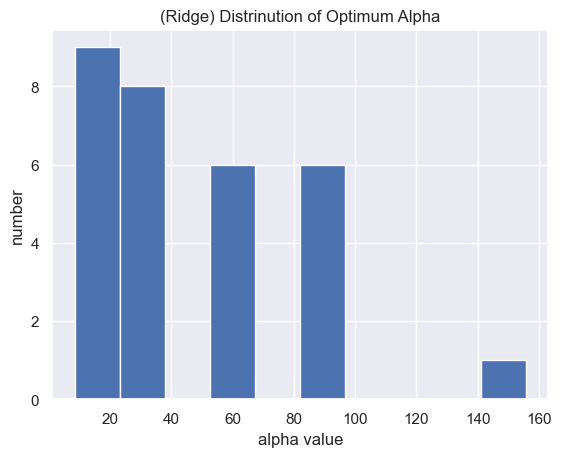

In [276]:
plt.hist(optimal_alpha_list, bins = 10)
plt.title('(Ridge) Distrinution of Optimum Alpha')
plt.xlabel('alpha value')
plt.ylabel('number')

Text(0, 0.5, 'Number')

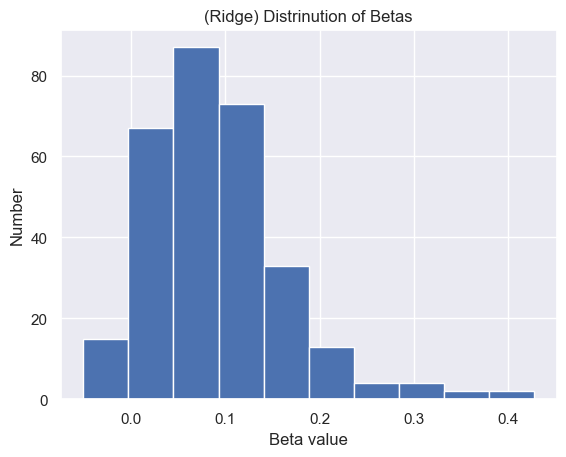

In [277]:
plt.hist(np.array(beta_list).flatten(), bins = 10)
plt.title('(Ridge) Distrinution of Betas')
plt.xlabel('Beta value')
plt.ylabel('Number')

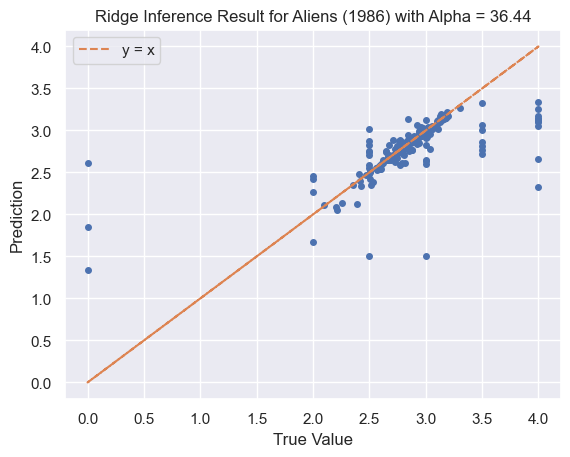

In [278]:
RMSE_list = []
COD_list = []
coef_list = []
count = 0
for i in middle_30_index:
    x = np.concatenate(predictors_rating_list, axis=1)
    y = movie_rating_list[i]
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size= 0.2)
    reg = Ridge(alpha = optimal_alpha_list[count]).fit(X_train, Y_train)
    coef_list.append(reg.coef_)
    Y_hat_test = reg.predict(X_test)
    COD = r2_score(Y_test,Y_hat_test)
    rmse = np.sqrt(np.mean(np.sum((Y_test-Y_hat_test)**2)))
    COD_list.append(COD)
    RMSE_list.append(rmse)
    count += 1

    if i == middle_30_index[0]:
        plt.title('Ridge Inference Result for ' + movie_list[middle_30_index[0]] + ' with Alpha = ' + str(optimal_alpha_list[count].round(2)))
        plt.plot(Y_test, Y_hat_test, 'o', ms = 4)
        plt.plot(Y_test, Y_test,'--', ms = 0.5, label = 'y = x')
        plt.xlabel('True Value')
        plt.ylabel('Prediction')
        plt.legend()

### Q4 

Repeat question 3) with LASSO regression. Again, make sure to comment on the hyperparameters
you use and betas you find by doing so. 

In [279]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [280]:
#range of regularization strength
alpha_choice_range = np.logspace(-10, 200, 1000)

test_COD_list = []
test_RMSE_list = []
optimal_alpha_list = []
beta_list = [] #coef

for i in middle_30_index:
#for each loop, we have different target movie to predict
    x = np.concatenate(predictors_rating_list, axis=1)
    y = movie_rating_list[i]
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size= 0.2, random_state = 10)
    reg = LassoCV(alphas = alpha_choice_range).fit(X_train, Y_train)
    
    optimal_alpha = reg.alpha_
    optimal_alpha_list.append(optimal_alpha)
    
    Y_test_prediction = reg.predict(X_test)
    test_COD_list.append(r2_score(Y_test,Y_test_prediction))
    test_RMSE_list.append(mean_squared_error(Y_test, Y_test_prediction, squared=False))

    beta_list.append(reg.coef_.round(3))

In [281]:
np.mean(np.array(test_RMSE_list))

0.39029822621200094

In [282]:
coef_table = pd.DataFrame(beta_list, columns= [predictor_name])
coef_table.insert(0, 'target movie name', middle_30_movie_name)
coef_table.insert(1, 'RMSE', test_RMSE_list)
coef_table.insert(2, 'Optimal Regularization Strengt Alpha', optimal_alpha_list)
coef_table

,target movie name,RMSE,Optimal Regularization Strengt Alpha,Titanic (1997),American Beauty (1999),Girl With a Pearl Earring (2003),Friday the 13th Part III (1982),Fargo (1996),Hellraiser (1987),Ghost (1990),Fahrenheit 9/11 (2004),Indiana Jones and the Kingdom of the Crystal Skull (2008),The Final Conflict (1981)
0,Aliens (1986),0.471666,5.994843e-03,0.000,0.046,0.101,0.000,0.067,0.183,0.131,0.002,0.020,0.442
1,Gone in Sixty Seconds (2000),0.354827,3.694601e-03,0.000,0.029,0.000,0.072,0.068,0.013,0.014,0.109,0.053,0.482
2,Crossroads (2002),0.365750,5.994843e-03,0.004,0.006,0.000,0.038,0.101,0.023,0.182,0.058,0.054,0.380
3,Austin Powers: The Spy Who Shagged Me (1999),0.567715,9.727203e-03,0.014,0.036,0.197,0.117,0.076,0.194,0.062,0.237,0.047,0.099
4,Austin Powers in Goldmember (2002),0.509406,5.994843e-03,0.000,0.052,0.207,0.108,0.030,0.149,-0.000,0.118,0.006,0.475
5,Goodfellas (1990),0.402020,3.694601e-03,0.000,0.047,0.172,0.000,0.046,0.166,0.009,0.169,-0.042,0.431
6,The Big Lebowski (1998),0.404347,3.694601e-03,-0.025,0.100,0.116,0.017,0.121,0.012,0.037,0.232,-0.000,0.400
7,Twister (1996),0.275397,1.403289e-03,0.015,0.096,0.068,0.097,0.104,0.090,0.142,0.119,0.023,0.181
8,Blues Brothers 2000 (1998),0.416596,5.994843e-03,0.000,0.073,0.265,0.012,0.002,0.180,0.045,0.000,0.025,0.235
9,Dances with Wolves (1990),0.427469,5.994843e-03,0.018,0.072,0.256,0.000,0.016,0.032,0.053,0.107,0.029,0.279


Text(0, 0.5, 'number')

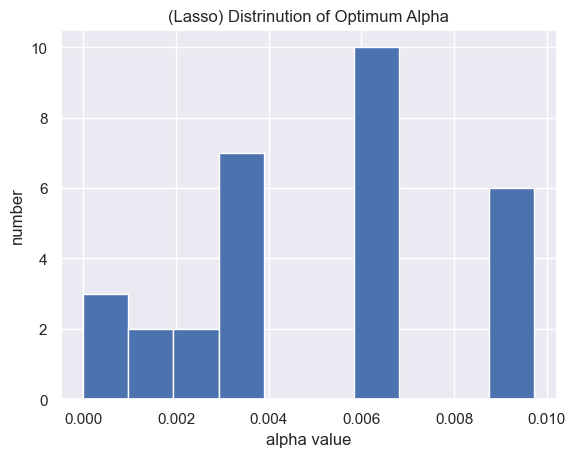

In [283]:
plt.hist(optimal_alpha_list, bins = 10)
plt.title('(Lasso) Distrinution of Optimum Alpha')
plt.xlabel('alpha value')
plt.ylabel('number')

Text(0, 0.5, 'Number')

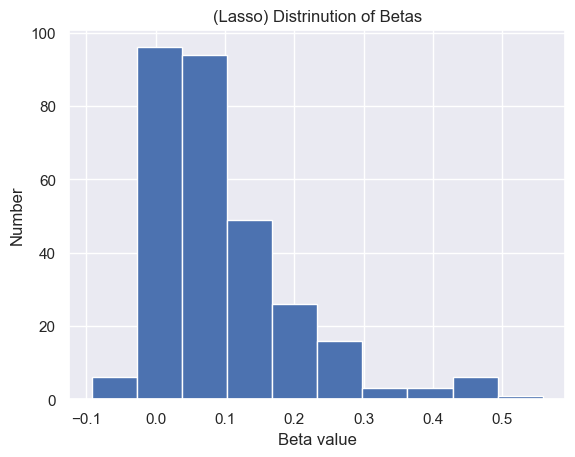

In [284]:
plt.hist(np.array(beta_list).flatten(), bins = 10)
plt.title('(Lasso) Distrinution of Betas')
plt.xlabel('Beta value')
plt.ylabel('Number')

### Q5

Compute the average movie enjoyment for each user (using only real, non-imputed data). Use these
averages as the predictor variable X in a logistic regression model. Sort the movies order of increasing
rating (also using only real, non-imputed data). Now pick the 4 movies in the middle of the score range
as your target movie. For each of them, do a media split (now using the imputed data) of ratings to
code movies above the median rating with the Y label 1 (= enjoyed) and movies below the median
with the label 0 (= not enjoyed). For each of these movies, build a logistic regression model (using X
to predict Y), show figures with the outcomes and report the betas as well as the AUC values.
Comment on the quality of your models. Make sure to use cross-validation methods to avoid
overfitting.

In [382]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegressionCV
from scipy.special import expit, logit

In [383]:
#Read original data
df_original = pd.read_csv('movieReplicationSet.csv')
df_original = df_original.apply(pd.to_numeric, errors = 'coerce')

In [384]:
#get a mean rating for each movie (raw)
each_movie_rating_mean = [] #ith entry represents avg rating of movie i
for i in range(N_movie):
    current_movie_mean = df_original.iloc[:,i].mean()
    each_movie_rating_mean.append(current_movie_mean)
each_movie_rating_mean = np.array(each_movie_rating_mean)
each_movie_rating_mean.shape

(400,)

In [385]:
#get a mean rating for each user (raw)
each_user_rating_mean = [] #ith entry represents avg rating of user i
for i in range(N_user):
    current_user_mean = df_original.iloc[i,:400].mean()
    if not np.isnan(current_user_mean):
        each_user_rating_mean.append(current_user_mean)
    else:
        each_user_rating_mean.append(2)
each_user_rating_mean = np.array(each_user_rating_mean)
each_user_rating_mean.shape

(1097,)

In [386]:
avg_movie_rating_ascending_index = each_movie_rating_mean.argsort() #index of movie in ascending rating order
pick_4_index = avg_movie_rating_ascending_index[198:202] #pick 4 in the middle

In [387]:
#build y label
y_label_list = []
for i in pick_4_index:
    #build y label
    median = df[movie_list[i]].median()
    y_label = (df[movie_list[i]]>= median).astype(int)
    y_label_list.append(y_label)

data = {movie_list[pick_4_index[0]]: y_label_list[0], movie_list[pick_4_index[1]]: y_label_list[1],\
    movie_list[pick_4_index[2]]: y_label_list[2], movie_list[pick_4_index[3]]: y_label_list[3]}
y_label_table = pd.DataFrame(data=data)
y_label_table 

,Fahrenheit 9/11 (2004),Happy Gilmore (1996),Diamonds are Forever (1971),Scream (1996)
0,0,1,0,0
1,0,0,0,0
2,1,1,1,1
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
1092,1,1,1,1
1093,1,1,1,1
1094,1,1,1,1
1095,1,1,1,1


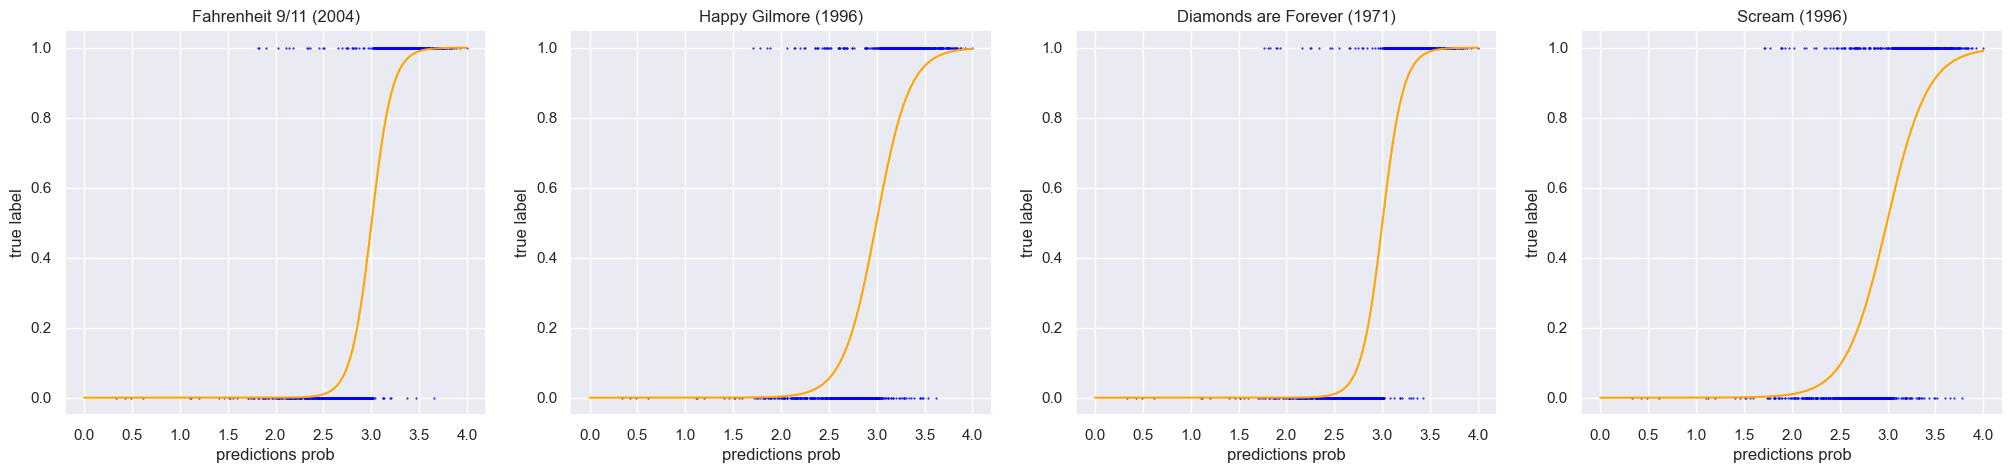

In [398]:
x = each_user_rating_mean.reshape(-1, 1)
coef_list = []
auc_list = []
fig, ax = plt.subplots(1, 4, figsize = (25, 5))

for i in range(4):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
    y = y_label_table.iloc[:, i]
    clf = LogisticRegressionCV().fit(x, y)

    y_test_pred = clf.predict(x)
    y_pred = clf.predict(x)

    auc = roc_auc_score(y, y_pred)
    auc_list.append(auc)

    coef_list.append(clf.coef_[0][0])

    x_all = np.linspace(0, 4, 300)
    y_all = expit(x_all * clf.coef_ + clf.intercept_).ravel()

    ax[i].plot(x, y, 'o', c ='blue', ms = 0.5)
    ax[i].plot(x_all, y_all, '-', c ='orange', ms = 0.5)
    ax[i].set_xlabel('predictions prob')
    ax[i].set_ylabel('true label')
    ax[i].set_title(movie_list[pick_4_index[i]])

In [399]:
logistic_result_table = pd.DataFrame({'Target Movie Name': y_label_table.columns, 'Coefficient (Beta)':coef_list, 'AUC Score':auc_list})
logistic_result_table

,Target Movie Name,Coefficient (Beta),AUC Score
0,Fahrenheit 9/11 (2004),9.215374,0.948952
1,Happy Gilmore (1996),5.751416,0.883306
2,Diamonds are Forever (1971),9.063547,0.952598
3,Scream (1996),4.635989,0.845926


### Extra Credict

In [336]:
index_IQ = movie_list.index('I.Q. (1994)')

In [337]:
#get COD with each of the single movie predictor
index_IQ = movie_list.index('I.Q. (1994)')
COD_list = [0 for i in range(N_movie)]

y = movie_rating_list[index_IQ] #ratings of I.Q. (1994)
for i in range(N_movie):
    if i != index_IQ:
        x = movie_rating_list[i]
        reg = LinearRegression(fit_intercept=False).fit(x.reshape(-1,1), y)
        y_hat = reg.predict(x.reshape(-1,1)) #prediction
        COD = r2_score(y,y_hat)
        COD_list[i] = COD
COD_list = np.array(COD_list)

In [338]:
N_predictors = 60
#find best N movie predictor of IQ
best_N_predictors_index = COD_list.argsort()[- N_predictors:][::-1]
best_N_COD_value = [COD_list[i] for i in best_N_predictors_index]


#find worst N movie predictor of IQ
worst_N_predictors_index = COD_list.argsort()[:N_predictors]
worst_N_COD_value = [COD_list[i] for i in worst_N_predictors_index]

In [339]:
y = movie_rating_list[index_IQ]
accumulative_COD_list_best = []
accumulative_COD_list_worst = []

for i in range(N_predictors): 
    x = movie_rating_list[best_N_predictors_index[0]].reshape(-1, 1)
    #for each loop add a new current best predictor
    for j in range(i):
        new_x = movie_rating_list[best_N_predictors_index[j]].reshape(-1, 1)
        x = np.concatenate((x, new_x), axis=1)

    #in the end, in the ith loop, we will have i + 1's predictor
    reg = LinearRegression(fit_intercept=False).fit(x, y)
    y_hat = reg.predict(x) #prediction
    COD = r2_score(y,y_hat)
    accumulative_COD_list_best.append(COD)

for i in range(N_predictors):
    x = movie_rating_list[worst_N_predictors_index[0]].reshape(-1, 1)
    for j in range(i):
        new_x = movie_rating_list[worst_N_predictors_index[j]].reshape(-1, 1)
        x = np.concatenate((x, new_x), axis=1)

    #in the end, in the ith loop, we will have i + 1's predictor
    reg = LinearRegression(fit_intercept=False).fit(x, y)
    y_hat = reg.predict(x) #prediction
    COD = r2_score(y,y_hat)
    accumulative_COD_list_worst.append(COD)

accumulative_COD_list_best = np.array(accumulative_COD_list_best)
accumulative_COD_list_worst = np.array(accumulative_COD_list_worst)

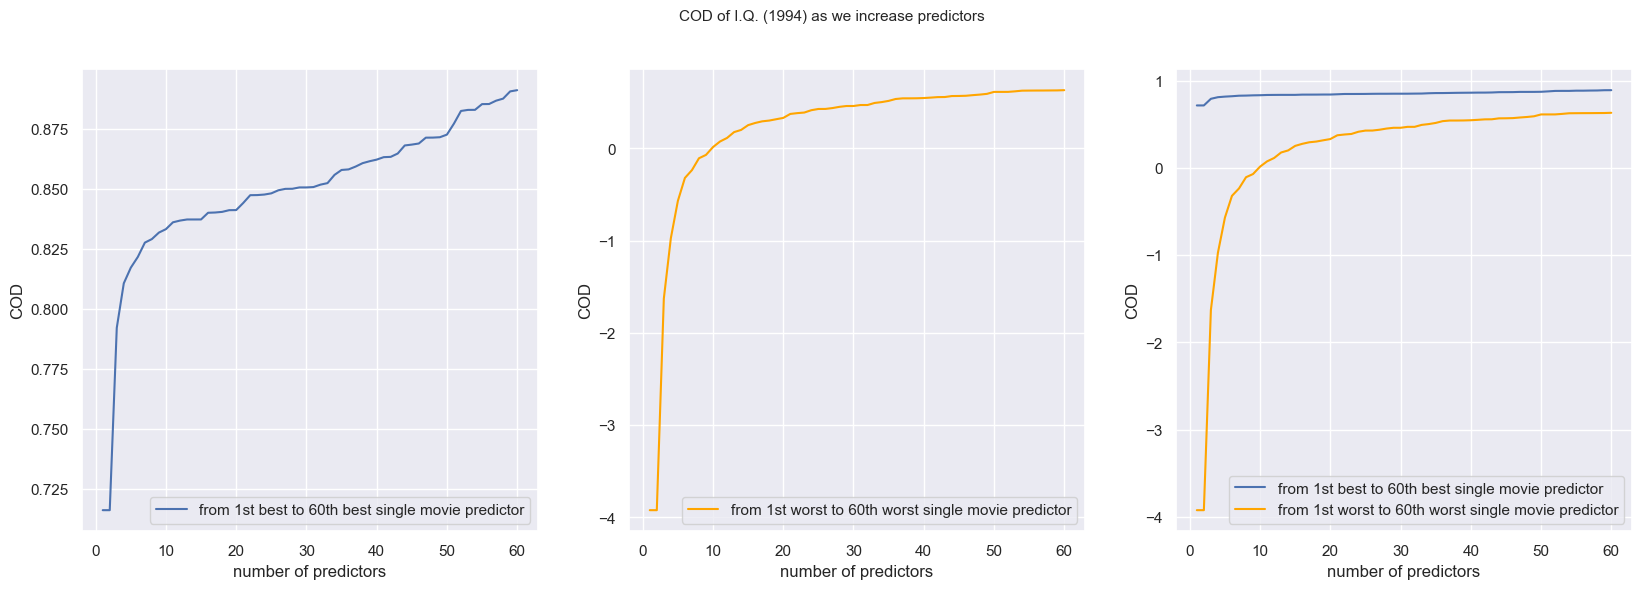

In [340]:
fig, ax = plt.subplots(1, 3, figsize = (20, 6))
fig.suptitle('COD of I.Q. (1994) as we increase predictors', fontsize=11)
x_range = np.arange(1, N_predictors + 1)

ax[0].plot(x_range, accumulative_COD_list_best, '-', label = 'from 1st best to ' + str(N_predictors) +'th best single movie predictor')
ax[0].set_xlabel('number of predictors')
ax[0].set_ylabel('COD')
ax[0].legend(loc="lower right")

ax[1].plot(x_range, accumulative_COD_list_worst, '-', label = 'from 1st worst to ' + str(N_predictors) +'th worst single movie predictor', c = 'orange')
ax[1].set_xlabel('number of predictors')
ax[1].set_ylabel('COD')
ax[1].legend(loc="lower right")

ax[2].plot(x_range, accumulative_COD_list_best, '-', label = 'from 1st best to ' + str(N_predictors) +'th best single movie predictor')
ax[2].plot(x_range, accumulative_COD_list_worst, '-', label = 'from 1st worst to ' + str(N_predictors) +'th worst single movie predictor', c = 'orange')
ax[2].set_xlabel('number of predictors')
ax[2].set_ylabel('COD')
ax[2].legend(loc="lower right")

plt.show()

In [341]:
#get COD with each of the single movie predictor
index_ETK = movie_list.index('Erik the Viking (1989)')
COD_list = [0 for i in range(N_movie)]

y = movie_rating_list[index_ETK ] #
for i in range(N_movie):
    if i != index_ETK :
        x = movie_rating_list[i]
        reg = LinearRegression(fit_intercept=False).fit(x.reshape(-1,1), y)
        y_hat = reg.predict(x.reshape(-1,1)) #prediction
        COD = r2_score(y,y_hat)
        COD_list[i] = COD
COD_list = np.array(COD_list)

In [342]:
N_predictors = 60
#find best N movie predictor of IQ
best_N_predictors_index = COD_list.argsort()[- N_predictors:][::-1]
best_N_COD_value = [COD_list[i] for i in best_N_predictors_index]


#find worst N movie predictor of IQ
worst_N_predictors_index = COD_list.argsort()[:N_predictors]
worst_N_COD_value = [COD_list[i] for i in worst_N_predictors_index]

In [343]:
y = movie_rating_list[index_ETK]
accumulative_COD_list_best = []
accumulative_COD_list_worst = []

for i in range(N_predictors): 
    x = movie_rating_list[best_N_predictors_index[0]].reshape(-1, 1)
    #for each loop add a new current best predictor
    for j in range(i):
        new_x = movie_rating_list[best_N_predictors_index[j]].reshape(-1, 1)
        x = np.concatenate((x, new_x), axis=1)

    #in the end, in the ith loop, we will have i + 1's predictor
    reg = LinearRegression(fit_intercept=False).fit(x, y)
    y_hat = reg.predict(x) #prediction
    COD = r2_score(y,y_hat)
    accumulative_COD_list_best.append(COD)

for i in range(N_predictors):
    x = movie_rating_list[worst_N_predictors_index[0]].reshape(-1, 1)
    for j in range(i):
        new_x = movie_rating_list[worst_N_predictors_index[j]].reshape(-1, 1)
        x = np.concatenate((x, new_x), axis=1)

    #in the end, in the ith loop, we will have i + 1's predictor
    reg = LinearRegression(fit_intercept=False).fit(x, y)
    y_hat = reg.predict(x) #prediction
    COD = r2_score(y,y_hat)
    accumulative_COD_list_worst.append(COD)

accumulative_COD_list_best = np.array(accumulative_COD_list_best)
accumulative_COD_list_worst = np.array(accumulative_COD_list_worst)

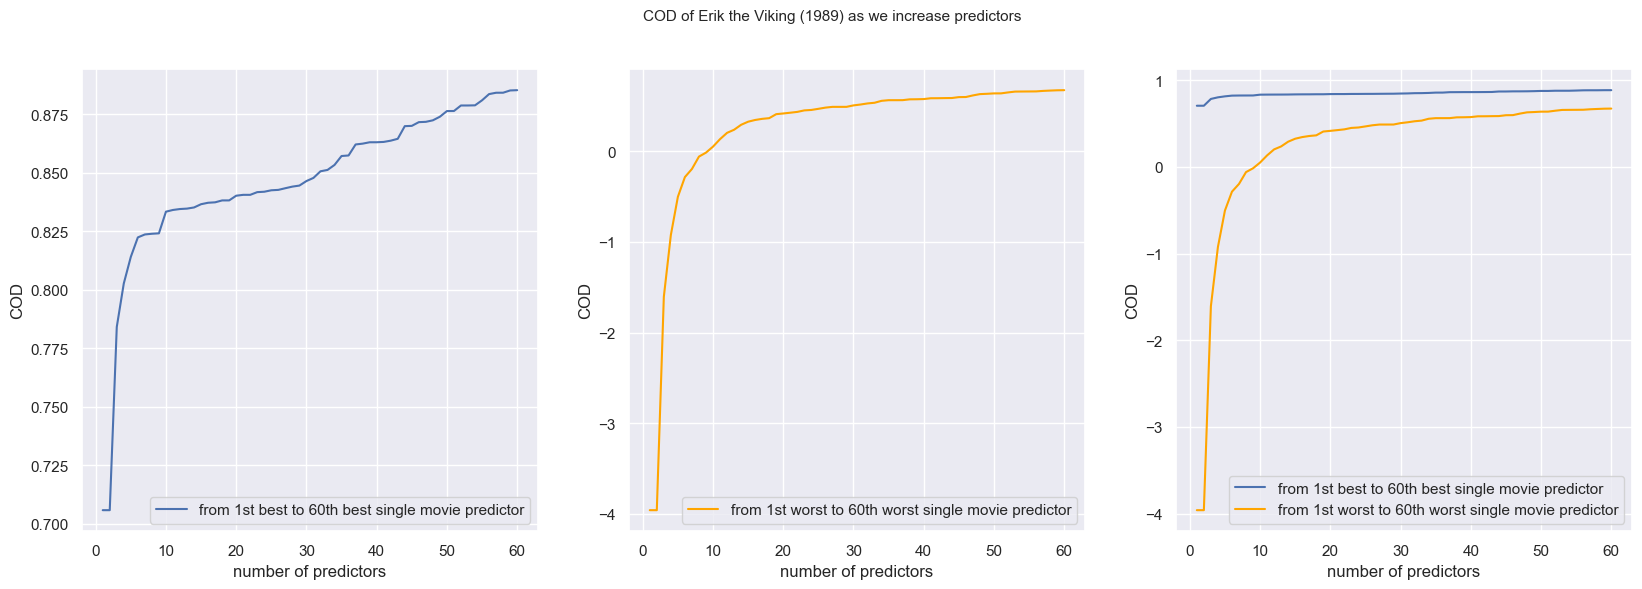

In [344]:
fig, ax = plt.subplots(1, 3, figsize = (20, 6))
fig.suptitle('COD of Erik the Viking (1989) as we increase predictors', fontsize=11)
x_range = np.arange(1, N_predictors + 1)

ax[0].plot(x_range, accumulative_COD_list_best, '-', label = 'from 1st best to ' + str(N_predictors) +'th best single movie predictor')
ax[0].set_xlabel('number of predictors')
ax[0].set_ylabel('COD')
ax[0].legend(loc="lower right")

ax[1].plot(x_range, accumulative_COD_list_worst, '-', label = 'from 1st worst to ' + str(N_predictors) +'th worst single movie predictor', c = 'orange')
ax[1].set_xlabel('number of predictors')
ax[1].set_ylabel('COD')
ax[1].legend(loc="lower right")

ax[2].plot(x_range, accumulative_COD_list_best, '-', label = 'from 1st best to ' + str(N_predictors) +'th best single movie predictor')
ax[2].plot(x_range, accumulative_COD_list_worst, '-', label = 'from 1st worst to ' + str(N_predictors) +'th worst single movie predictor', c = 'orange')
ax[2].set_xlabel('number of predictors')
ax[2].set_ylabel('COD')
ax[2].legend(loc="lower right")

plt.show()